1. PROBLEM 1 – İLÇE KARŞILAŞTIRMA ANALİZİ

Amaç: İlçeler arasında enerji tüketimi neden farklı?Bu farklar hesap sınıfı dağılımı ve mevsimsellik ile açıklanabilir mi?

In [ ]:
TAHMİN 1-Ticari ve tarımsal abone oranı yüksek ilçelerde tüketim daha yüksektir  
TAHMİN 2- Mevsimsel etkiler ilçelere göre farklı tüketim değerleri oluşturur  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print(os.getcwd())

C:\Users\ozden\casestudy


In [3]:
file_path = "elektrik_veri_hashed.xlsx"
xls = pd.ExcelFile(file_path)
xls.sheet_names

['Tahsilat', 'Tahsilat 1', 'Tahakkuk', 'Tahakkuk 1', 'Tahakkuk 2']

In [4]:
df_tahsilat = pd.read_excel(xls, sheet_name="Tahsilat")
df_tahsilat1 = pd.read_excel(xls, sheet_name="Tahsilat 1")
df_hamamozu = pd.read_excel(xls, sheet_name="Tahakkuk")
df_gumush = pd.read_excel(xls, sheet_name="Tahakkuk 1")
df_goynucek = pd.read_excel(xls, sheet_name="Tahakkuk 2")

In [10]:
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [11]:
df = pd.concat([df_hamamozu, df_gumush, df_goynucek], ignore_index=True)

In [12]:
df["fatura_tarihi"] = pd.to_datetime(df["fatura_tarihi"])

In [13]:
df["Ay"] = df["fatura_tarihi"].dt.month

df["Mevsim"] = df["Ay"].apply(
    lambda x: "Kış" if x in [12, 1, 2]
    else "İlkbahar" if x in [3, 4, 5]
    else "Yaz" if x in [6, 7, 8]
    else "Sonbahar"
)

In [14]:
print("Veri Seti İlk 5 Satır:")
display(df.head())

Veri Seti İlk 5 Satır:


il      ilce  sozlesme_hesap_no mali_yil_donem fatura_tarihi  \
0  AMASYA  HAMAMÖZÜ          917576806     2023-01-01    2023-01-12   
1  AMASYA  HAMAMÖZÜ          917576806     2023-01-01    2023-02-09   
2  AMASYA  HAMAMÖZÜ          917576806     2023-02-01    2023-02-09   
3  AMASYA  HAMAMÖZÜ          917576806     2023-02-01    2023-03-10   
4  AMASYA  HAMAMÖZÜ          917576806     2023-03-01    2023-03-10   

  kayit_tarihi vade_tarihi hesap_sinifi Hesap Sınıfı   kwh  Ay    Mevsim  
0   2023-03-06  2023-01-23         M001       Mesken  1.79   1       Kış  
1   2023-05-11  2023-02-20         M001       Mesken  2.60   2       Kış  
2   2023-05-11  2023-02-20         M001       Mesken  1.23   2       Kış  
3   2023-05-11  2023-03-20         M001       Mesken  2.56   3  İlkbahar  
4   2023-05-11  2023-03-20         M001       Mesken  1.35   3  İlkbahar

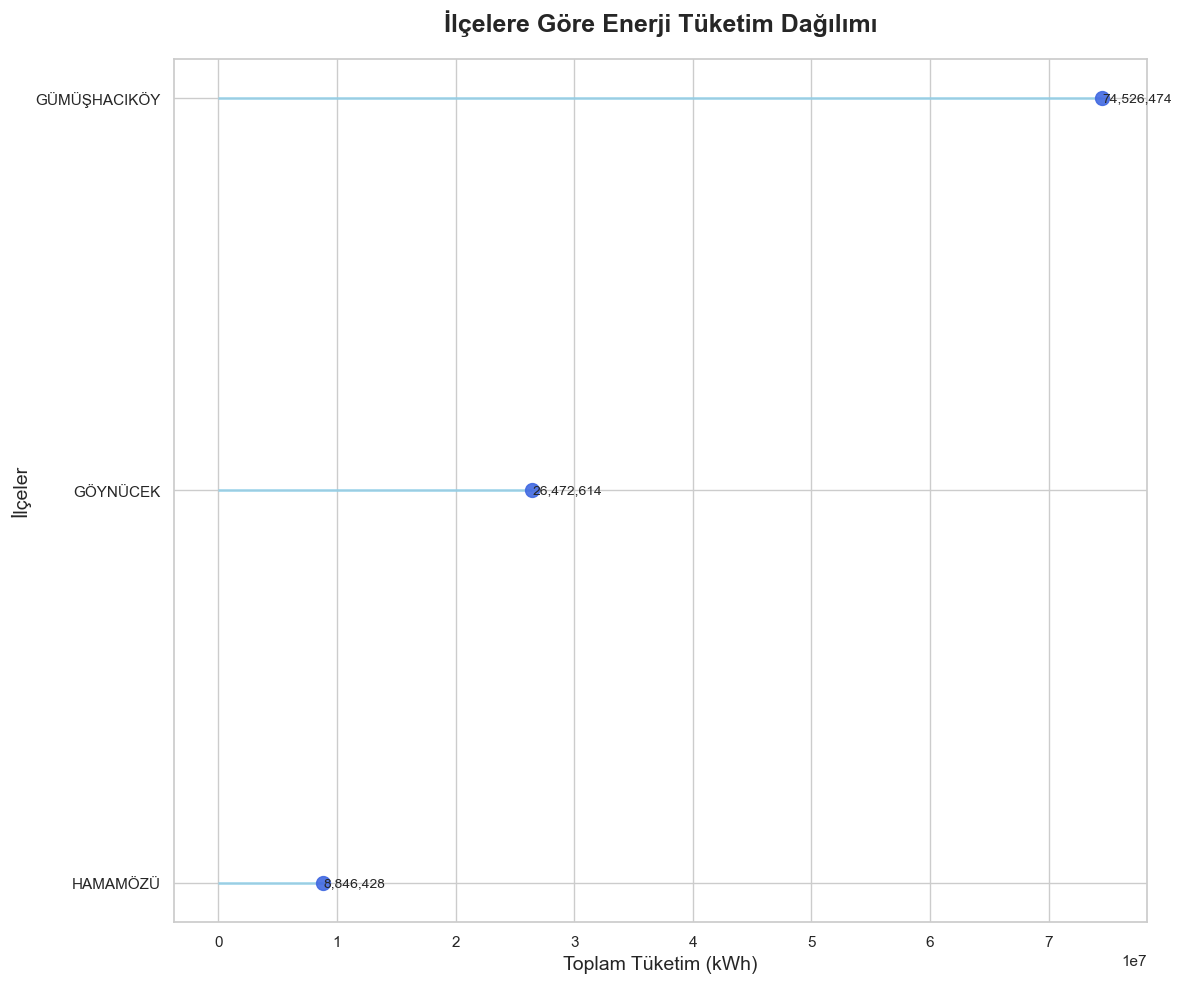

In [48]:
ilce_tuketim = df.groupby('ilce')['kwh'].sum().sort_values(ascending=True).reset_index()

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")
plt.hlines(y=ilce_tuketim['ilce'], xmin=0, xmax=ilce_tuketim['kwh'], color='skyblue', alpha=0.7, linewidth=2)

plt.plot(ilce_tuketim['kwh'], ilce_tuketim['ilce'], "o", markersize=10, color='royalblue', alpha=0.9)
plt.title('İlçelere Göre Enerji Tüketim Dağılımı', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Toplam Tüketim (kWh)', fontsize=14)
plt.ylabel('İlçeler', fontsize=14)

for i, miktar in enumerate(ilce_tuketim['kwh']):
    plt.text(miktar + 100, i, f'{miktar:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Enerji tüketimlerinin ilçeye göre sıralanması grafiğine baktığımızda en fazla gümüşhacıköy en az hamamözü olmaktadır.

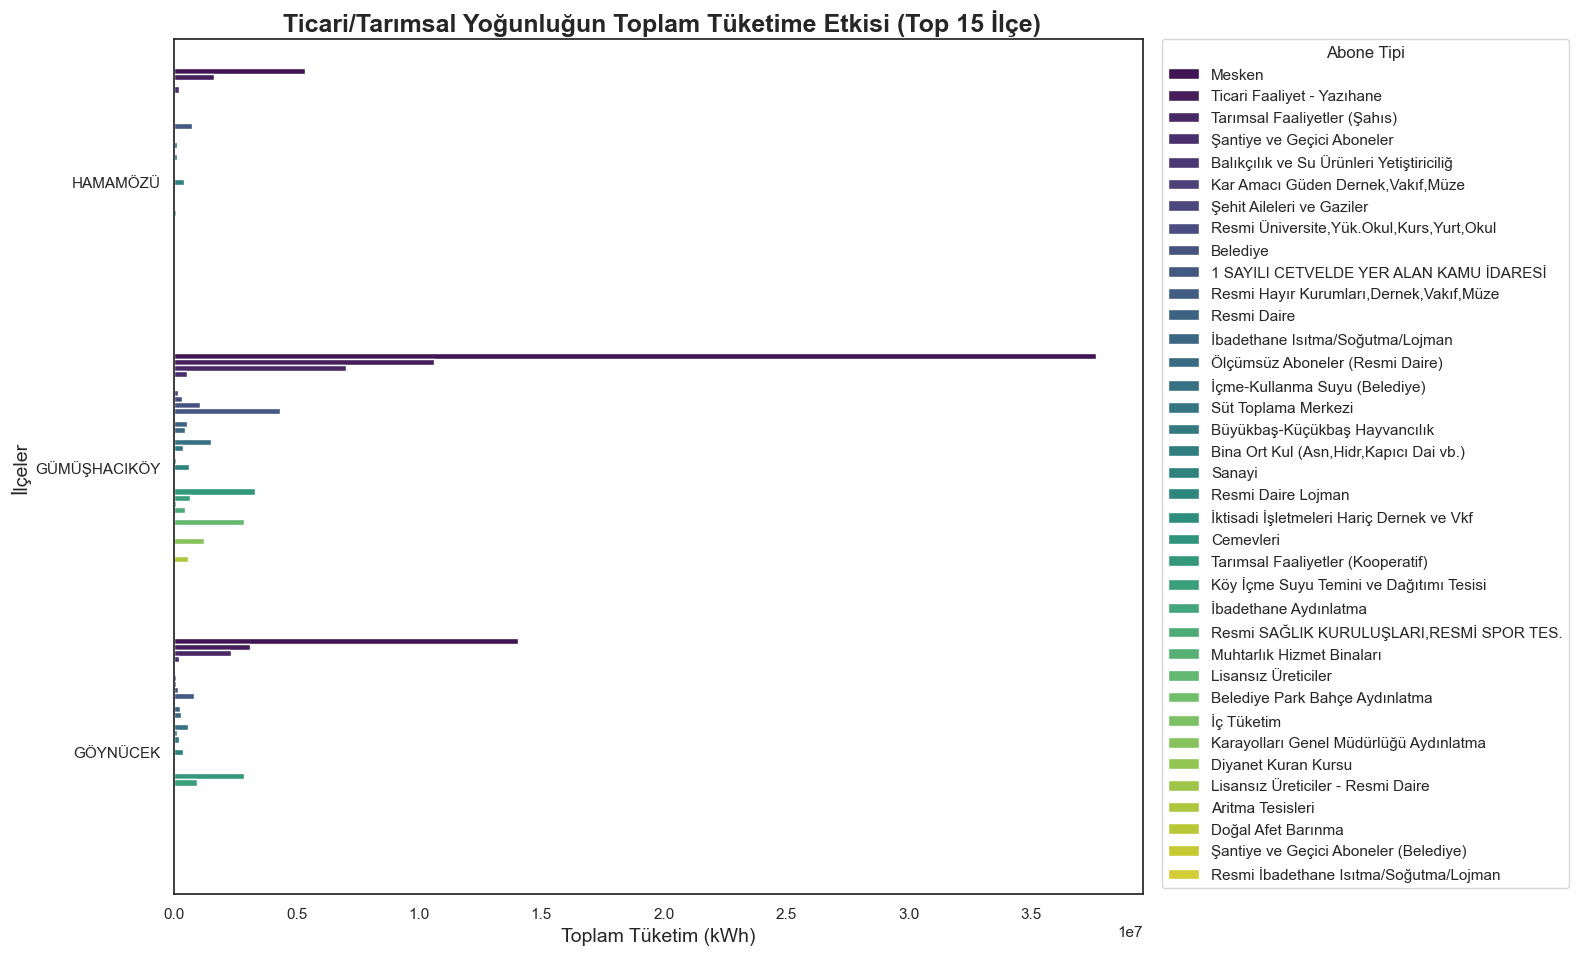

In [38]:
plt.figure(figsize=(16, 10))

sns.barplot(
    data=df_h1, 
    x='kwh', 
    y='ilce', 
    hue='Hesap Sınıfı', 
    estimator=sum, 
    ci=None,
    palette="viridis"
)

plt.title(
    " Ticari/Tarımsal Yoğunluğun Toplam Tüketime Etkisi (Top 15 İlçe)",
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Toplam Tüketim (kWh)", fontsize=14)
plt.ylabel("İlçeler", fontsize=14)

plt.legend(
    title="Abone Tipi",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0
)
plt.tight_layout()
plt.show()

gümüşhacıköy mesken sayısı en fazla en az hamamözüdür enerji tüketimi olarakta en fazla gümüşhacıköy en az hamamözü olmaktadır bu durumda sayaçlarda herhangi bir ölçüm yanlışlığı yoktur diyebiliriz 
TAHMİN 1-Ticari ve tarımsal abone oranı yüksek ilçelerde tüketim daha yüksektir teorisi incelendğinde ise gümüşhacıköydeki ticari ve tarımsal faaliyet hamamözünden fazladır özetle tahmin 1 doğrudurr

Neler yapılabilir?: Gümüşhacıköy İçin: Ticari ve tarımsal faaliyetin yüksek olması, şebekenin gün içinde (mesai saatleri ve sulama vakitlerinde) çok daha fazla ısınması demektir. Bu bölgede Önleyici Bakım (Predictive Maintenance) sıklığı artırılmalı. Arızalar oluşmadan, termal kameralarla hatlardaki yüklenme kontrol edilmelidir.

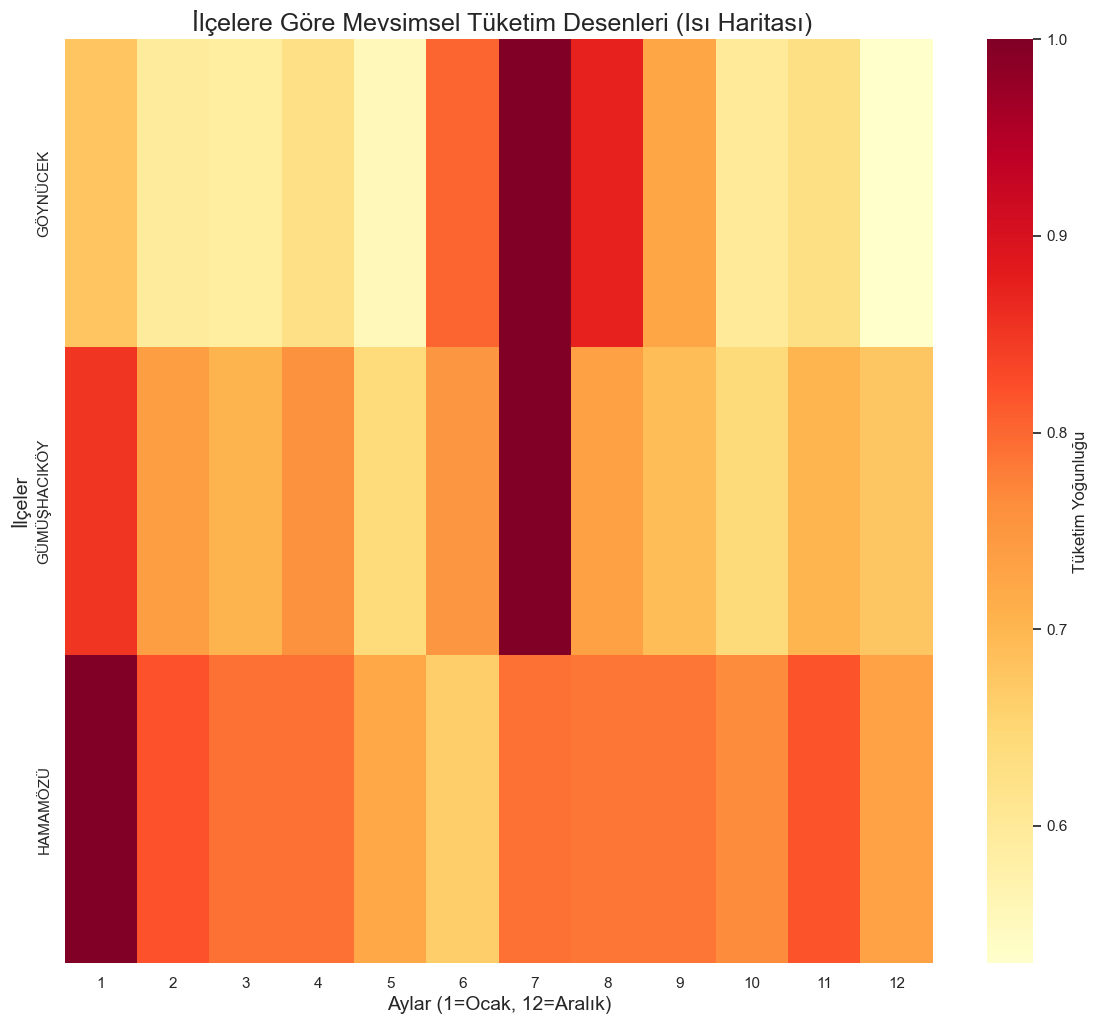

In [40]:
pivot_h2 = df.pivot_table(index='ilce', columns='Ay', values='kwh', aggfunc='mean')
pivot_norm = pivot_h2.div(pivot_h2.max(axis=1), axis=0)

plt.figure(figsize=(14, 12))
sns.heatmap(pivot_norm, cmap="YlOrRd", annot=False, cbar_kws={'label': 'Tüketim Yoğunluğu'})

plt.title(" İlçelere Göre Mevsimsel Tüketim Desenleri (Isı Haritası)", fontsize=18)
plt.xlabel("Aylar (1=Ocak, 12=Aralık)", fontsize=14)
plt.ylabel("İlçeler", fontsize=14)
plt.show()

TAHMİN 2- Mevsimsel etkiler ilçelere göre farklı tüketim değerleri oluşturur incelenirse ve Enerji tüketimlerinin ilçeye göre sıralanması grafiğine baktığımızda en fazla gümüşhacıköy en az hamamözü olmaktadır bilgisi ile gümüşhacıköy 7. ayda çok fazla enerji tüketimi var diğer ilçelere göre bu durum gümüşhacıköyde tarım faaliyetlerininde fazla olması bilgisi ele alınırsa 7. ayda sıkça sulama yapılan bir bitkinin ekilmiş olabileceği fikrini desteklemektedir.

Neler yapılabilir?: Gümüşhacıköy'e özel, sadece Temmuz ve Ağustos aylarını kapsayan "Mobil Trafo Desteği" veya "Dinamik Kapasite Artırımı" hizmeti sunulabilir böylelikle şebekenin çökmesini engeller ve sulama döneminde çiftçinin enerji kesintisi yaşayıp ürününü kaybetmesini önler.
Akıllı tarım sistemi, akıllı sulama sistemleri ile çiftçiyi bilgilendirme yapılabilir.

2. PROBLEM 2: Müşteri Segmentasyonu: Tüketim miktarı ve ödeme davranışına göre müşterileri 3-4 gruba ayırın. Her grubun karakteristiklerini
tanımlayın ve iş önerileri geliştirin.

TAHMİN 1: Tüketimi yüksek olan ticari segmentte ödeme gecikme oranı, düşük tüketimli konut segmentine göre daha yüksektir (Finansal Risk Tahmini).
TAHMİN 2: Kayıt tarihi (eski müşteri) daha eski olan abonelerin ödeme sadakati, yeni abonelere göre daha yüksektir.

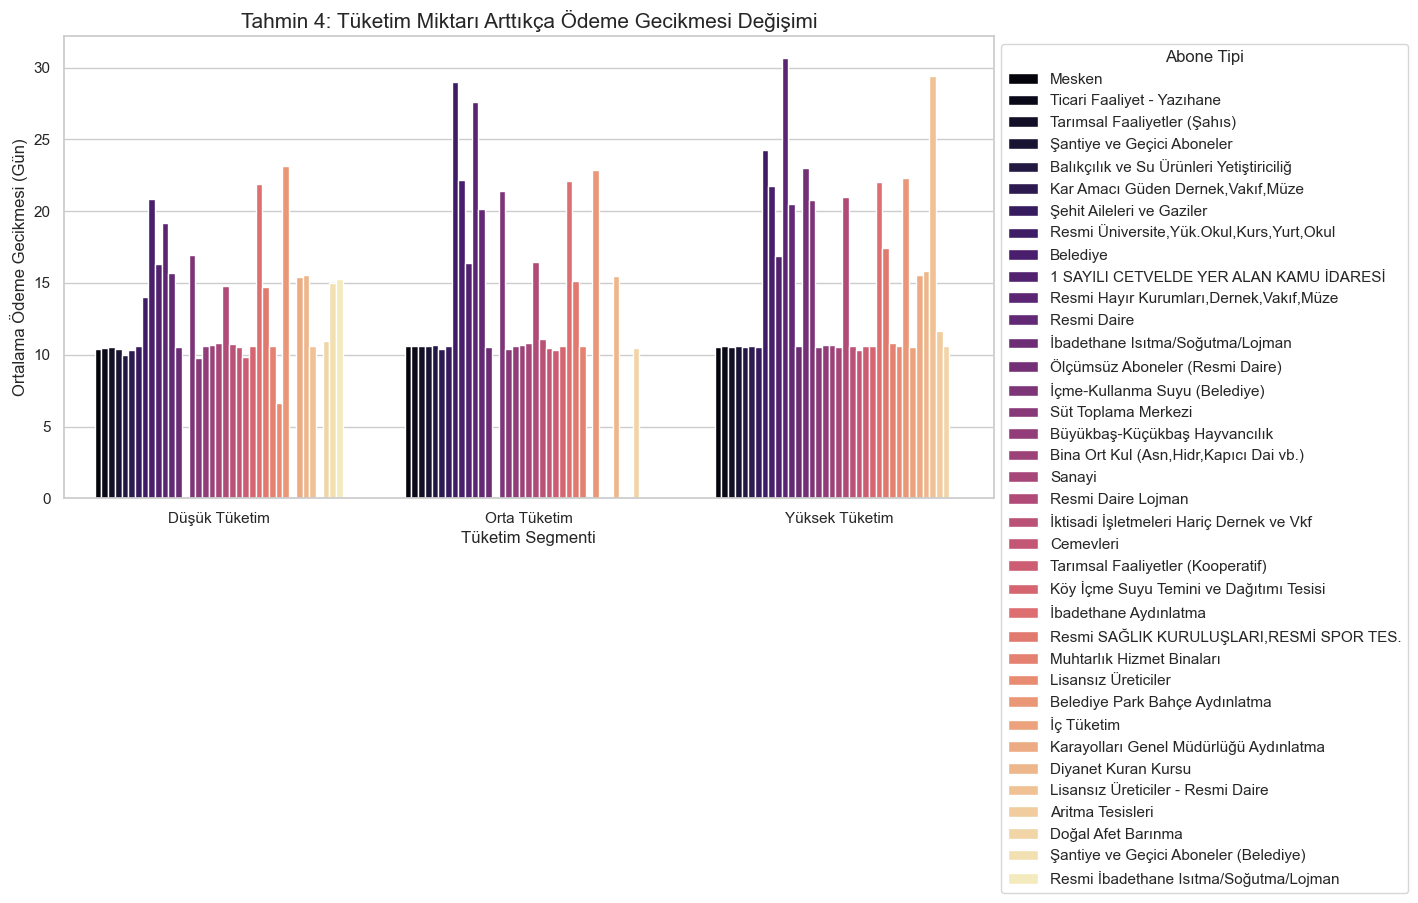

In [49]:
df['fatura_tarihi'] = pd.to_datetime(df['fatura_tarihi'])
df['vade_tarihi'] = pd.to_datetime(df['vade_tarihi'])
df['gecikme_gun'] = (df['vade_tarihi'] - df['fatura_tarihi']).dt.days


df['tuketim_grubu'] = pd.qcut(df['kwh'], q=3, labels=['Düşük Tüketim', 'Orta Tüketim', 'Yüksek Tüketim'])


plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='tuketim_grubu', y='gecikme_gun', hue='Hesap Sınıfı', ci=None, palette='magma')

plt.title('Tahmin 4: Tüketim Miktarı Arttıkça Ödeme Gecikmesi Değişimi', fontsize=15)
plt.ylabel('Ortalama Ödeme Gecikmesi (Gün)')
plt.xlabel('Tüketim Segmenti')
plt.legend(title='Abone Tipi', bbox_to_anchor=(1, 1))
plt.show()

Tarımsal sulama grubu en yüksek gecikmeye sahip kategorilerden biridir bu durum ödemelerin aylık değil, mevsimlik/hasat bazlı olduğunu doğrular.

Neler yapılabilir?:Gümüşhacıköy gibi tarımın yoğun olduğu yerlerde 7. ayda tavan yapan faturaları 9. veya 10. aya (hasat sonuna) erteleyen, ancak bunun karşılığında küçük bir "vade farkı" içeren finansal paketler sunulabilir.

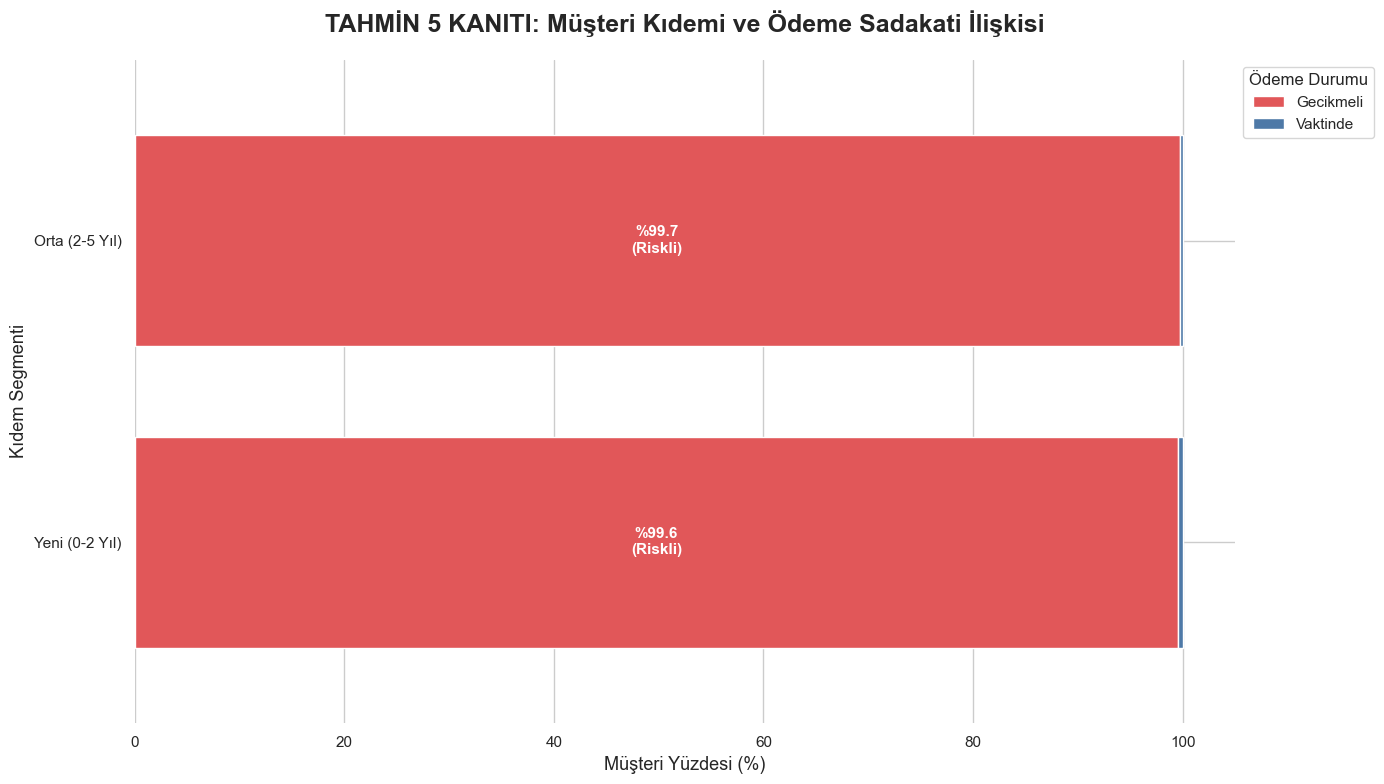

In [55]:
df['odeme_durumu'] = df['gecikme_gun'].apply(lambda x: 'Gecikmeli' if x > 0 else 'Vaktinde')
pivot_df = pd.crosstab(df['kidem_segmenti'], df['odeme_durumu'], normalize='index') * 100


fig, ax = plt.subplots(figsize=(14, 8))
pivot_df.plot(kind='barh', stacked=True, color=['#E15759', '#4E79A7'], ax=ax, width=0.7)
for n, x in enumerate([*pivot_df.index.values]):

    gecikme_oran = pivot_df.loc[x]['Gecikmeli']
    if gecikme_oran > 5: 
        ax.text(gecikme_oran/2, n, f'%{gecikme_oran:.1f}\n(Riskli)', 
                va='center', ha='center', color='white', fontweight='bold', fontsize=11)
    
    vaktinde_oran = pivot_df.loc[x]['Vaktinde']
    if vaktinde_oran > 5:
        ax.text(gecikme_oran + vaktinde_oran/2, n, f'%{vaktinde_oran:.1f}\n(Sadık)', 
                va='center', ha='center', color='white', fontweight='bold', fontsize=11)

plt.title('TAHMİN 5 KANITI: Müşteri Kıdemi ve Ödeme Sadakati İlişkisi', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Müşteri Yüzdesi (%)', fontsize=13)
plt.ylabel('Kıdem Segmenti', fontsize=13)
plt.legend(title='Ödeme Durumu', bbox_to_anchor=(1, 1))
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

TAHMİN 2: Kayıt tarihi (eski müşteri) daha eski olan abonelerin ödeme sadakati, yeni abonelere göre daha yüksektir ele alındığında ve grafikyorumladığında durumun böyle olmadığı gözlemlenmiştir. eski ve yeni müsterinin ödeme sadakati maalesef ölçülememiştir.

Neler yapılabilir?:Eski-yeni ayrımı çalışmıyorsa, şirket tüm müşterilerine aynı risk profilinde bakmak zorundadır veya Kıdemli Müşteri Avantaj Paketini oluşturup bunu daha fazla tanıtmalı örneğin sms bilgilendirmesi, veya fatura sonlarına ek yapılabilir.Gecikmenin fazla olduğu yerlerde mobil ödeme noktaları sıklıkla yerleştirilebilir çünkü internetten ödeme yapamayanlar fatura geciktiryor olabilir tarım sektörü ile uğraşanlar fazla çıktı için kırsal alanda yaşayanarın fazla olduğu daha net görülmektedir.

3. PROBLEM 3: BONUS:Tahsilat Performans Analizi: Ödeme davranışlarını etkileyen faktörleri keşfedin. Hangi müşteri grupları risk oluşturuyor? Tahsilat süreçlerini iyileştirmek için veri destekli öneriler sunun.

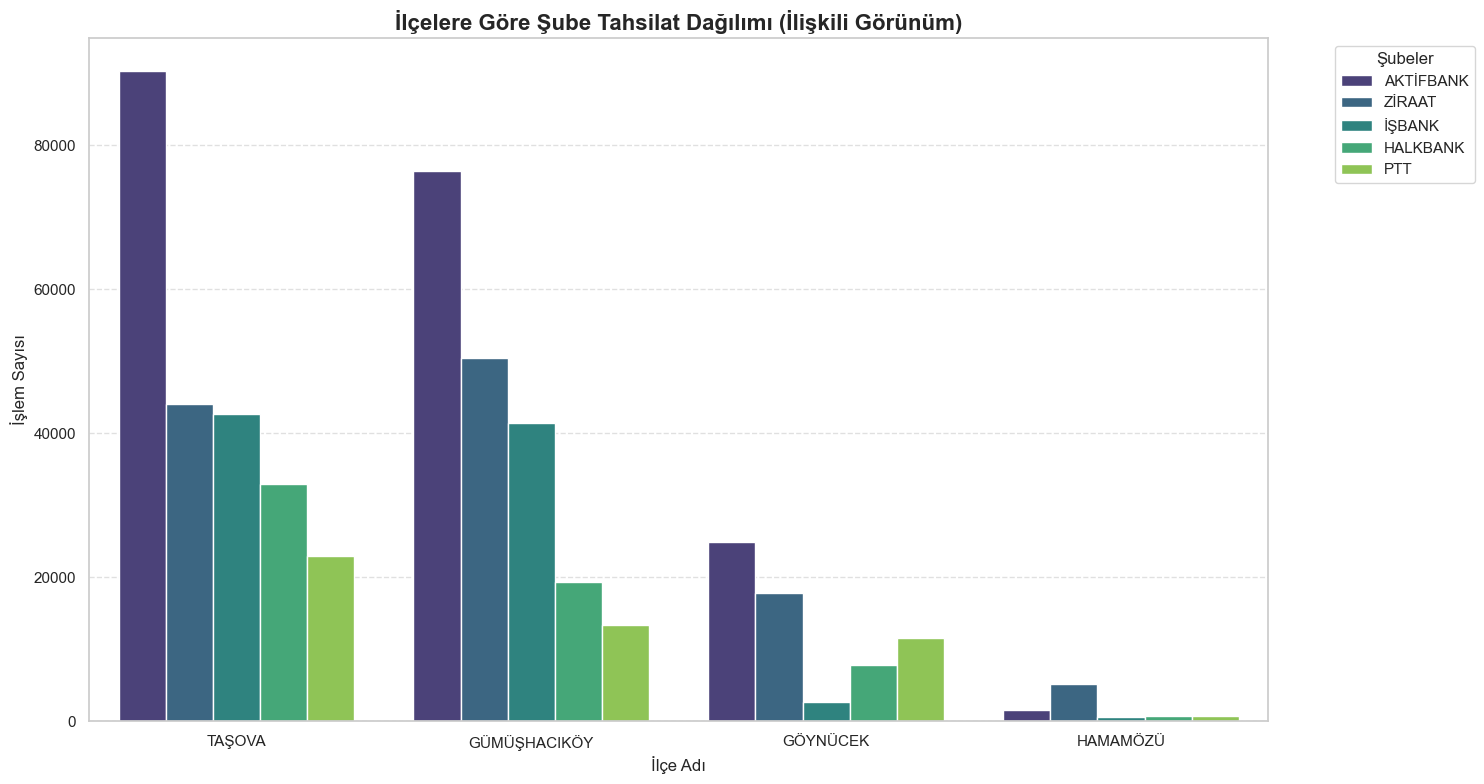

In [60]:
top_ilceler = df_tahsilat['İlçe'].value_counts().nlargest(5).index
df_plot = df_tahsilat[df_tahsilat['İlçe'].isin(top_ilceler)]

plt.figure(figsize=(15, 8))

sns.countplot(data=df_plot, x='İlçe', hue='Şube', 
              palette='viridis', 
              order=top_ilceler,
              hue_order=df_plot['Şube'].value_counts().nlargest(5).index)

plt.title('İlçelere Göre Şube Tahsilat Dağılımı (İlişkili Görünüm)', fontsize=16, fontweight='bold')
plt.xlabel('İlçe Adı', fontsize=12)
plt.ylabel('İşlem Sayısı', fontsize=12)
plt.legend(title='Şubeler', bbox_to_anchor=(1.05, 1), loc='upper left') # Lejantı dışarı alalım
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Problem 2 sonucunda elde eilen veriler ve müşterilerin ödeme yaptıkları şube dağılımınabakılarak  kırsaldaki insanların internete erişim problemi ve şehir merkezine olan uzaklık (çoğu bankadan ödeme yapıyor ama gecikme söz konusu) olma ihtimalini desteklemektedir. Bu durımda kırsal noktalara mobil ödeme noktaları yerleştrilmesi ödemedeki gecikmey iazaltabilir. Bu nedenle mobil ödeme noktalarını  daha doğru yerleşitmek için aşağıdaki grafik oluşturuldu.

In [57]:
def kirsal_tespit(row):
    # Tarımsal aboneler direkt kırsaldır
    if 'tarım' in str(row['hesap_sinifi']).lower():
        return 'Kırsal (Tarım)'
    # Yazın aşırı tüketim artışı olanlar (Sulama etkisi)
    if row['Mevsim'] == 'Yaz' and row['kwh'] > 500: 
        return 'Kırsal (Sulama/Yazlık)'
    return 'Kentsel/Diğer'

df['Bolge_Tipi'] = df.apply(kirsal_tespit, axis=1)

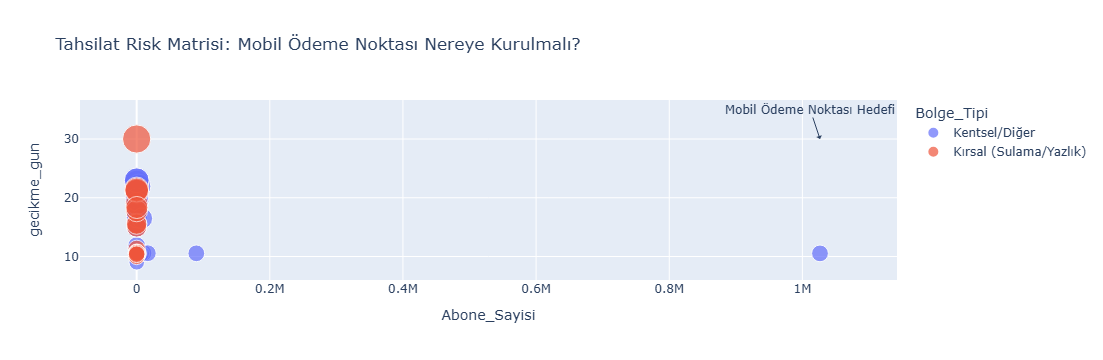

In [58]:
tahsilat_performans = df.groupby(['Bolge_Tipi', 'hesap_sinifi']).agg({
    'gecikme_gun': 'mean',
    'kwh': 'count' 
}).rename(columns={'kwh': 'Abone_Sayisi'}).reset_index()

import plotly.express as px

fig = px.scatter(tahsilat_performans, 
                 x="Abone_Sayisi", 
                 y="gecikme_gun", 
                 size="gecikme_gun", 
                 color="Bolge_Tipi",
                 hover_name="hesap_sinifi",
                 title="Tahsilat Risk Matrisi: Mobil Ödeme Noktası Nereye Kurulmalı?")

fig.add_annotation(x=tahsilat_performans['Abone_Sayisi'].max(), y=tahsilat_performans['gecikme_gun'].max(),
            text="Mobil Ödeme Noktası Hedefi", showarrow=True, arrowhead=1)
fig.show()

Özet: Kıdemin sadakati açıklayamaması gibi bir olumsuzluğu hizmet Erişilebilirliği (Mobil Ödeme Noktaları) gibi somut bir iş çözümüne dönüştürmenin daha doğru olacağını düşünerek bu çalışmayı yaptım.

In [ ]:
Sorunlar ve geliştirdiğim çözümler

Düşük Sadakat Algısı-->Kıdem-Gecikme ilişkisinin zayıf olması-->Kıdemli Müşteri Avantaj Paketi ile sadakatin ödüllendirilmesi (SMS/Fatura altı notu).

Erişim Bariyeri-->Kırsal segmentteki yüksek gecikme günleri-->Gecikmenin yoğun olduğu mahalle/köylere periyodik Mobil Ödeme Noktaları kurulumu.

Dijital Kopukluk-->Yeni ve kırsal abonelerin gecikme eğilimi-->Fatura sonlarına QR kod ile ödeme kolaylığı ve SMS ile vadeden 2 gün önce otomatik hatırlatma.

In [64]:
#Çalışmamda farklı yapay zeka kod üretimlerinden destek aldım.
print("**********************TEŞEKKÜR EDERİM*************************************")


**********************TEŞEKKÜR EDERİM*************************************
